In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources//hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)



In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_year_df = pd.DataFrame(prcp_year, columns = ["Date", "Precipitation"])
clean_prcp_year = prcp_year_df.dropna()
#prcp_year_df = prcp_year_df.set_index("Date")

# Sort the dataframe by date
clean_prcp_year.sort_values(by=["Date"])
clean_prcp_year.dtypes

Date              object
Precipitation    float64
dtype: object

Text(0.5, 1.0, 'Yearly Rainfall')

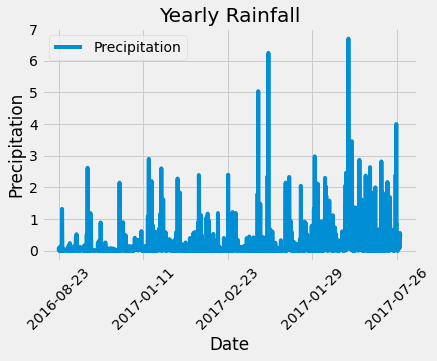

In [66]:
 
# Use Pandas Plotting with Matplotlib to plot the data

clean_prcp_year.plot(x = "Date", y = 'Precipitation', rot=45)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Yearly Rainfall')


In [67]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_prcp_year.describe(include = 'all')


,Date,Precipitation
count,2021,2021.000000
unique,366,NaN
top,2017-02-24,NaN
freq,7,NaN
mean,NaN,0.177279
std,NaN,0.461190
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.020000
75%,NaN,0.130000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()